## Problem Statement:
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 1. Understanding Data With Descriptive Statistics 

### Dimensions Of The Data 

In [3]:
shape = data.shape
print(shape)

(614, 13)


### Data Type For Each Attribute 

In [4]:
types = data.dtypes
print(types)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


### Descriptive Statistics 

In [5]:
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 3)
description = data.describe()
print(description)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
count          614.000            614.000     592.000            600.00         564.000
mean          5403.459           1621.246     146.412            342.00           0.842
std           6109.042           2926.248      85.587             65.12           0.365
min            150.000              0.000       9.000             12.00           0.000
25%           2877.500              0.000     100.000            360.00           1.000
50%           3812.500           1188.500     128.000            360.00           1.000
75%           5795.000           2297.250     168.000            360.00           1.000
max          81000.000          41667.000     700.000            480.00           1.000


### Class Distribution (Classification Only)
On classification problems you need to know how balanced the class values are. Highly imbalanced
problems (a lot more observations for one class than another) are common and may need special
handling in the data preparation stage of the project. we can quickly get an idea of the
distribution of the class attribute in Pandas. 

In [6]:
class_counts = data.groupby(['Loan_Status']).size()
print(class_counts)

Loan_Status
N    192
Y    422
dtype: int64


- we can see that there are nearly double the number of observations with class Y (no onset of diabetes) than there are with class N (onset of diabetes).

## Skew of Univariate Distributions
Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or
squashed in one direction or another. Many machine learning algorithms assume a Gaussian
distribution. Knowing that an attribute has a skew may allow you to perform data preparation
to correct the skew and later improve the accuracy of your models. You can calculate the skew
of each attribute using the skew() function on the Pandas DataFrame. 

In [7]:
skew = data.skew()
print(skew)

ApplicantIncome      6.540
CoapplicantIncome    7.492
LoanAmount           2.678
Loan_Amount_Term    -2.362
Credit_History      -1.882
dtype: float64


- The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

In [8]:
data.isnull().sum()/data.shape[0]*100

Loan_ID              0.000
Gender               2.117
Married              0.489
Dependents           2.443
Education            0.000
Self_Employed        5.212
ApplicantIncome      0.000
CoapplicantIncome    0.000
LoanAmount           3.583
Loan_Amount_Term     2.280
Credit_History       8.143
Property_Area        0.000
Loan_Status          0.000
dtype: float64

## 2.Understanding Data With Visulization 

### Histograms
A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms
group data into bins and provide you a count of the number of observations in each bin. From
the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed
or even has an exponential distribution. It can also help you see possible outliers. 

In [9]:
from matplotlib import pyplot
data.hist()
pyplot.rcParams['figure.figsize'] = [15,5]
pyplot.show()

<Figure size 640x480 with 6 Axes>

- We can see that perhaps the attributes applicantincome, coapplicantincome may have an exponential distribution.

### Density Plots
Density plots are another way of getting a quick idea of the distribution of each attribute. The
plots look like an abstracted histogram with a smooth curve drawn through the top of each bin,
much like your eye tried to do with the histograms. 

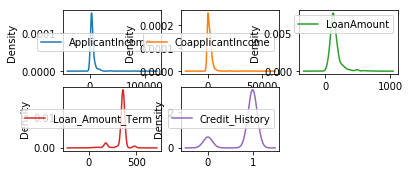

In [10]:
data.plot(kind = 'density',subplots = True, layout = (3,3),sharex = False)
pyplot.rcParams['figure.figsize'] = [30,25]
pyplot.show()

### Box and Whisker Plots
Another useful way to review the distribution of each attribute is to use Box and Whisker Plots
or boxplots for short. Boxplots summarize the distribution of each attribute, drawing a line for
the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of
the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers
show candidate outlier values (values that are 1.5 times greater than the size of spread of the
middle 50% of the data). 

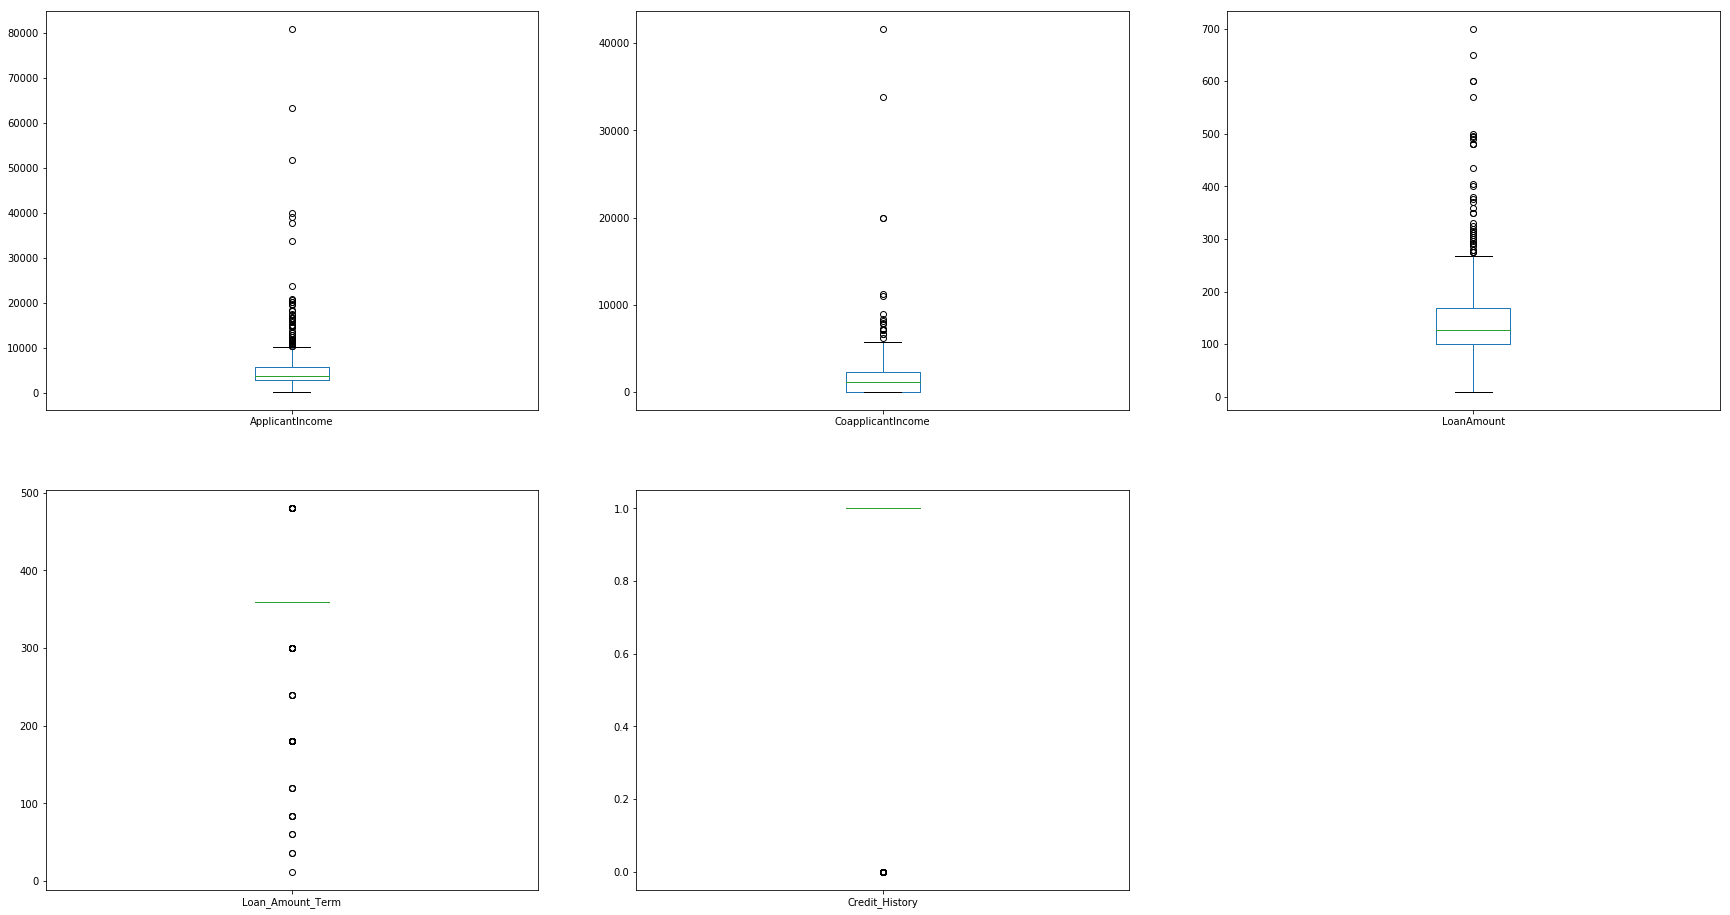

In [11]:
data.plot(kind = 'box',subplots = True, layout = (3,3),sharex = False, sharey = False)
pyplot.rcParams['figure.figsize'] = [50,25]
pyplot.show()

- We can see that the spread of attributes is quite different. Some like Loan_Amount_Term, Credit_History appear quite skewed towards smaller values.

## Multivariate Plots 

### Correlation Matrix Plot
Correlation gives an indication of how related the changes are between two variables. If two
variables change in the same direction they are positively correlated. If they change in opposite
directions together (one goes up, one goes down), then they are negatively correlated. You can
calculate the correlation between each pair of attributes. This is called a correlation matrix. You
can then plot the correlation matrix and get an idea of which variables have a high correlation
with each other. This is useful to know, because some machine learning algorithms like linear
and logistic regression can have poor performance if there are highly correlated input variables
in your data. 

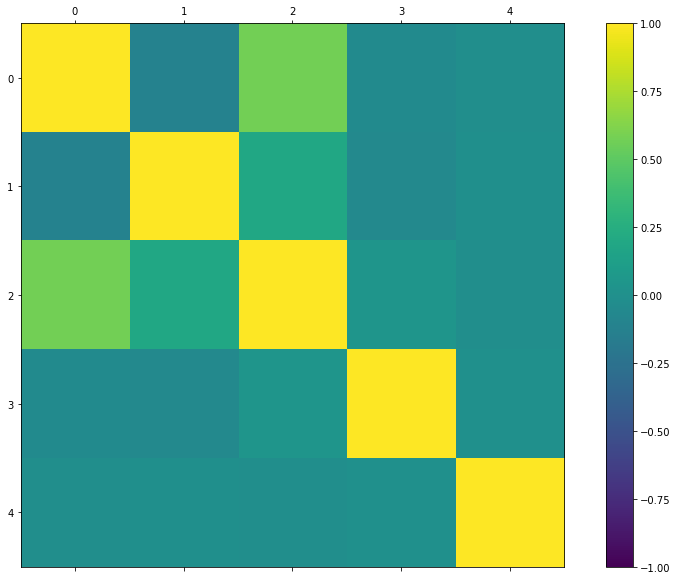

In [12]:
correlations = data.corr()
pyplot.rcParams['figure.figsize'] = [15,10]
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
pyplot.show()

### Scatter Plot Matrix
A scatter plot shows the relationship between two variables as dots in two dimensions, one
axis for each attribute. You can create a scatter plot for each pair of attributes in your data.
Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful
for spotting structured relationships between variables, like whether you could summarize the
relationship between two variables with a line. Attributes with structured relationships may
also be correlated and good candidates for removal from your dataset. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


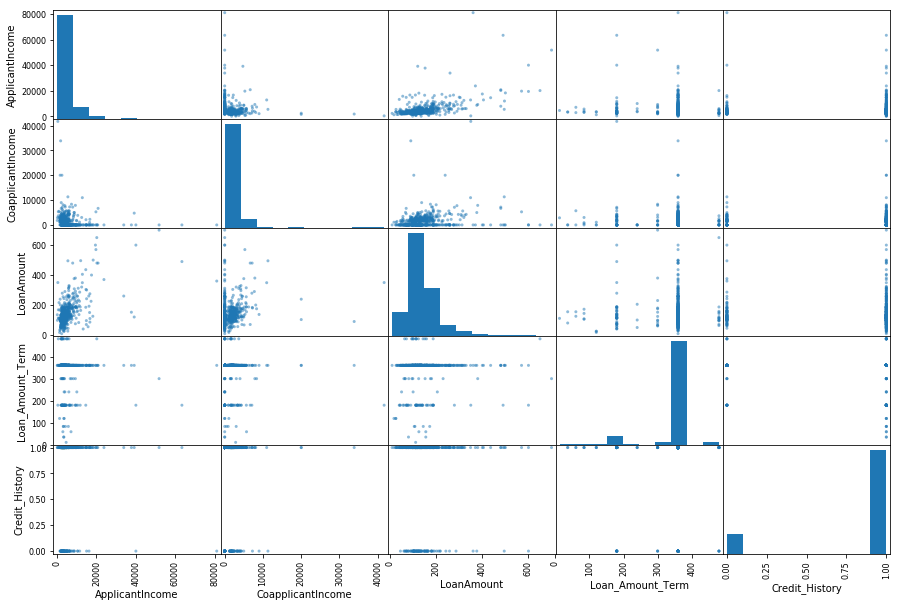

In [13]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data)
pyplot.rcParams['figure.figsize'] = [15,20]
pyplot.show()

# 3. Exploratory Data Analysis

In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 3.1 Gender VS Loan_Status

In [15]:
gender_vs_loanstatus = data[['Gender','Loan_Status']]
gender_vs_loanstatus = gender_vs_loanstatus.groupby(['Gender','Loan_Status']).size().reset_index()
gender_vs_loanstatus = gender_vs_loanstatus.rename(columns = {0:'Count'})
gender_vs_loanstatus

,Gender,Loan_Status,Count
0,Female,N,37
1,Female,Y,75
2,Male,N,150
3,Male,Y,339


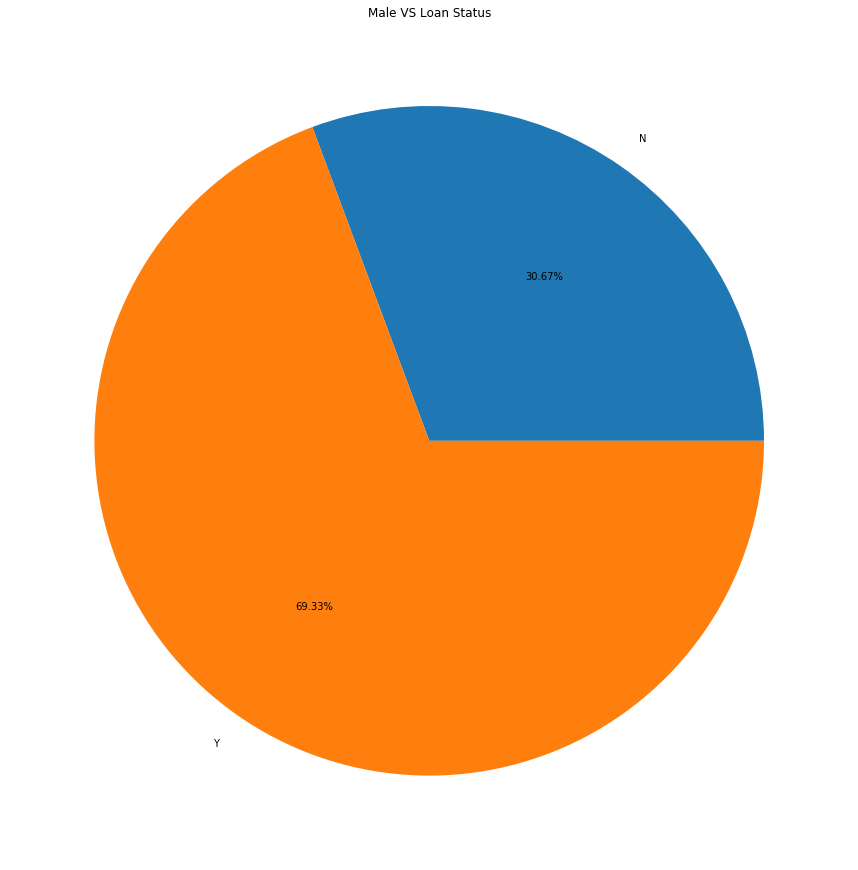

In [16]:
male_vs_loanstatus = gender_vs_loanstatus[gender_vs_loanstatus['Gender'] == 'Male']
pyplot.pie(male_vs_loanstatus['Count'],labels = male_vs_loanstatus['Loan_Status'], autopct = '%.2f%%')
pyplot.rcParams['figure.figsize'] = [10,10]
pyplot.title('Male VS Loan Status')
pyplot.show()

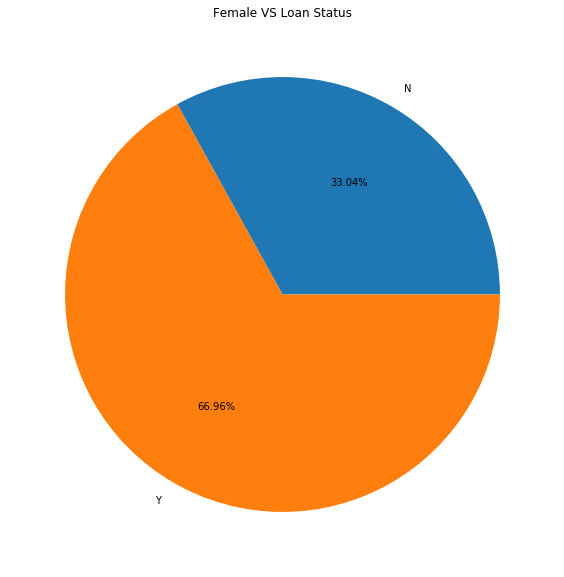

In [17]:
female_vs_loanstatus = gender_vs_loanstatus[gender_vs_loanstatus['Gender'] == 'Female']
pyplot.pie(female_vs_loanstatus['Count'],labels = female_vs_loanstatus['Loan_Status'], autopct = '%.2f%%')
pyplot.rcParams['figure.figsize'] = [10,10]
pyplot.title('Female VS Loan Status')
pyplot.show()

### 3.2 MartialStatus VS Loan_Status

In [18]:
married_vs_loanstatus = data[['Married','Loan_Status']]
married_vs_loanstatus = married_vs_loanstatus.groupby(['Married','Loan_Status']).size().reset_index()
married_vs_loanstatus

,Married,Loan_Status,0
0,No,N,79
1,No,Y,134
2,Yes,N,113
3,Yes,Y,285


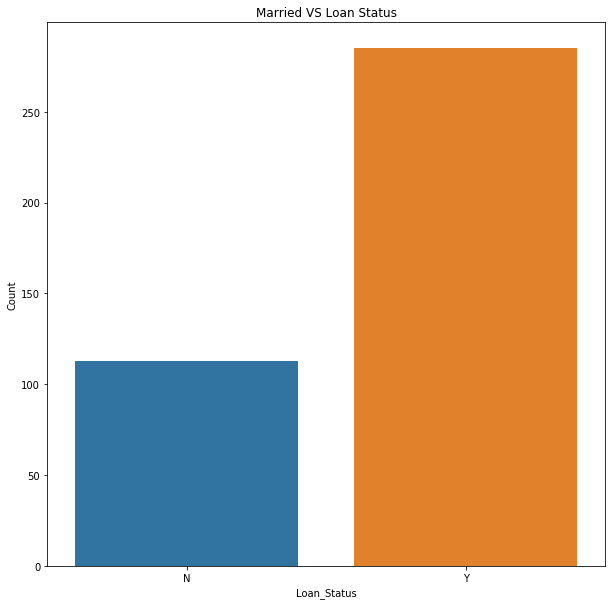

In [19]:
import seaborn as sns
married_vs_loanstatus_yes = married_vs_loanstatus[married_vs_loanstatus['Married'] == 'Yes']
married_vs_loanstatus_yes = married_vs_loanstatus_yes.rename(columns = {0:'Count'})
sns.barplot(married_vs_loanstatus_yes['Loan_Status'],married_vs_loanstatus_yes['Count'])
pyplot.rcParams['figure.figsize'] = [10,10]
pyplot.title('Married VS Loan Status')
pyplot.show()

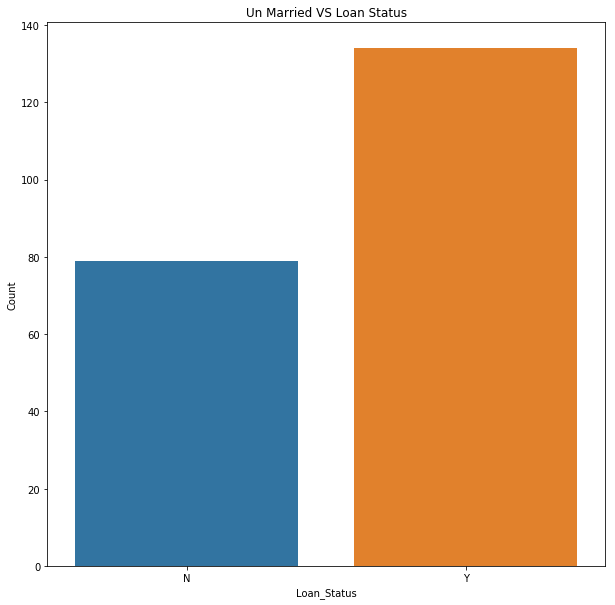

In [20]:
import seaborn as sns
unmarried_vs_loanstatus_yes = married_vs_loanstatus[married_vs_loanstatus['Married'] == 'No']
unmarried_vs_loanstatus_yes = unmarried_vs_loanstatus_yes.rename(columns = {0:'Count'})
sns.barplot(unmarried_vs_loanstatus_yes['Loan_Status'],unmarried_vs_loanstatus_yes['Count'])
pyplot.rcParams['figure.figsize'] = [1,1]
pyplot.title('Un Married VS Loan Status')
pyplot.show()

### 3.3 Education VS Loan_Status

In [21]:
data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [22]:
education_vs_loan_status = data[['Education','Loan_Status']]
education_vs_loan_status = education_vs_loan_status.groupby(['Education','Loan_Status']).size().reset_index()
education_vs_loan_status = education_vs_loan_status.rename(columns = {0:'Count'})
education_vs_loan_status

,Education,Loan_Status,Count
0,Graduate,N,140
1,Graduate,Y,340
2,Not Graduate,N,52
3,Not Graduate,Y,82


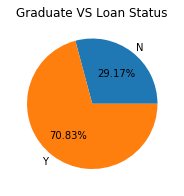

In [23]:
graduate_vs_loanstatus = education_vs_loan_status[education_vs_loan_status['Education'] == 'Graduate']
pyplot.rcParams['figure.figsize'] = [3,3]
pyplot.pie(graduate_vs_loanstatus['Count'],labels = graduate_vs_loanstatus['Loan_Status'],autopct = '%.2f%%')
pyplot.title('Graduate VS Loan Status')
pyplot.show()

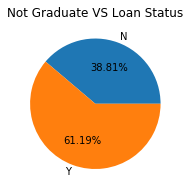

In [24]:
not_graduate_vs_loanstatus = education_vs_loan_status[education_vs_loan_status['Education'] == 'Not Graduate']
pyplot.rcParams['figure.figsize'] = [3,3]
pyplot.pie(not_graduate_vs_loanstatus['Count'],labels = not_graduate_vs_loanstatus['Loan_Status'],autopct = '%.2f%%')
pyplot.title('Not Graduate VS Loan Status')
pyplot.show()

### 3.4 SelfEmployed VS Loan_Status

In [25]:
data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [26]:
selfemployed_vs_loan_status = data[['Self_Employed','Loan_Status']]
selfemployed_vs_loan_status = selfemployed_vs_loan_status.groupby(['Self_Employed','Loan_Status']).size().reset_index()
selfemployed_vs_loan_status = selfemployed_vs_loan_status.rename(columns = {0:'Count'})
selfemployed_vs_loan_status

,Self_Employed,Loan_Status,Count
0,No,N,157
1,No,Y,343
2,Yes,N,26
3,Yes,Y,56


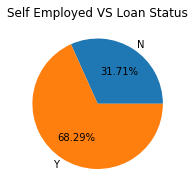

In [27]:
selfemployed_vs_loan_status_yes = selfemployed_vs_loan_status[selfemployed_vs_loan_status['Self_Employed'] == 'Yes']
pyplot.rcParams['figure.figsize'] = [3,3]
pyplot.pie(selfemployed_vs_loan_status_yes['Count'],labels = selfemployed_vs_loan_status_yes['Loan_Status'],autopct = '%.2f%%')
pyplot.title('Self Employed VS Loan Status')
pyplot.show()

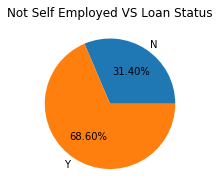

In [28]:
not_selfemployed_vs_loan_status = selfemployed_vs_loan_status[selfemployed_vs_loan_status['Self_Employed'] == 'No']
pyplot.rcParams['figure.figsize'] = [3,3]
pyplot.pie(not_selfemployed_vs_loan_status['Count'],labels = not_selfemployed_vs_loan_status['Loan_Status'],autopct = '%.2f%%')
pyplot.title('Not Self Employed VS Loan Status')
pyplot.show()

### 3.5 Credit_History VS Loan Status 

In [29]:
data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [30]:
credithistory_vs_loanstatus = data[['Credit_History','Loan_Status']]
credithistory_vs_loanstatus = credithistory_vs_loanstatus.groupby(['Credit_History','Loan_Status']).size().reset_index()
credithistory_vs_loanstatus = credithistory_vs_loanstatus.rename(columns = {0:'Count'})
credithistory_vs_loanstatus

,Credit_History,Loan_Status,Count
0,0.0,N,82
1,0.0,Y,7
2,1.0,N,97
3,1.0,Y,378


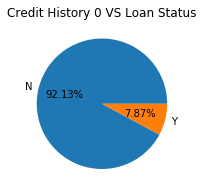

In [31]:
credithistory_0_vs_loan_status = credithistory_vs_loanstatus[credithistory_vs_loanstatus['Credit_History'] == 0.0]
pyplot.rcParams['figure.figsize'] = [3,3]
pyplot.pie(credithistory_0_vs_loan_status['Count'],labels = credithistory_0_vs_loan_status['Loan_Status'],autopct = '%.2f%%')
pyplot.title('Credit History 0 VS Loan Status')
pyplot.show()

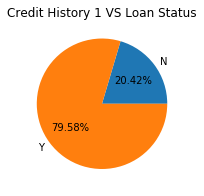

In [32]:
credithistory_1_vs_loan_status = credithistory_vs_loanstatus[credithistory_vs_loanstatus['Credit_History'] == 1.0]
pyplot.rcParams['figure.figsize'] = [3,3]
pyplot.pie(credithistory_1_vs_loan_status['Count'],labels = credithistory_1_vs_loan_status['Loan_Status'],autopct = '%.2f%%')
pyplot.title('Credit History 1 VS Loan Status')
pyplot.show()

### 3.6 Dependents VS Loan Status 

In [33]:
data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [34]:
dependents_vs_loanstatus = data[['Dependents','Loan_Status']]
dependents_vs_loanstatus = dependents_vs_loanstatus.groupby(['Dependents','Loan_Status']).size().reset_index()
dependents_vs_loanstatus = dependents_vs_loanstatus.rename(columns = {0:'Count'})
dependents_vs_loanstatus

,Dependents,Loan_Status,Count
0,0,N,107
1,0,Y,238
2,1,N,36
3,1,Y,66
4,2,N,25
5,2,Y,76
6,3+,N,18
7,3+,Y,33


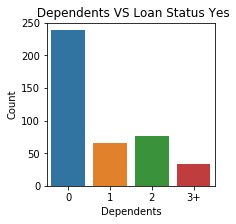

In [35]:
dependents_vs_loanstatus_yes = dependents_vs_loanstatus[dependents_vs_loanstatus['Loan_Status'] == 'Y']
pyplot.rcParams['figure.figsize'] = [3,3]
sns.barplot(dependents_vs_loanstatus_yes['Dependents'],dependents_vs_loanstatus_yes['Count'])
pyplot.title(' Dependents VS Loan Status Yes')
pyplot.show()

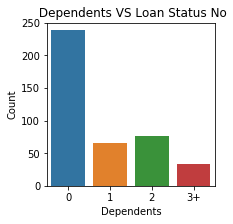

In [36]:
dependents_vs_loanstatus_no = dependents_vs_loanstatus[dependents_vs_loanstatus['Loan_Status'] == 'N']
pyplot.rcParams['figure.figsize'] = [3,3]
sns.barplot(dependents_vs_loanstatus_yes['Dependents'],dependents_vs_loanstatus_yes['Count'])
pyplot.title(' Dependents VS Loan Status No')
pyplot.show()

### 3.7 Property Area VS Loan Status 

In [37]:
data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [38]:
property_area_vs_loanstatus = data[['Property_Area','Loan_Status']]
property_area_vs_loanstatus = property_area_vs_loanstatus.groupby(['Property_Area','Loan_Status']).size().reset_index()
property_area_vs_loanstatus = property_area_vs_loanstatus.rename(columns = {0:'Count'})
property_area_vs_loanstatus

,Property_Area,Loan_Status,Count
0,Rural,N,69
1,Rural,Y,110
2,Semiurban,N,54
3,Semiurban,Y,179
4,Urban,N,69
5,Urban,Y,133


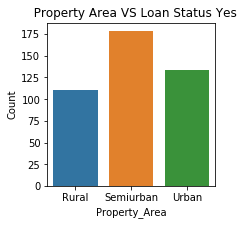

In [39]:
property_area_vs_loanstatus_yes = property_area_vs_loanstatus[property_area_vs_loanstatus['Loan_Status'] == 'Y']
pyplot.rcParams['figure.figsize'] = [3,3]
sns.barplot(property_area_vs_loanstatus_yes['Property_Area'],property_area_vs_loanstatus_yes['Count'])
pyplot.title('  Property Area VS Loan Status Yes')
pyplot.show()

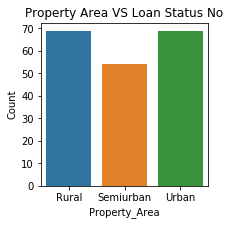

In [40]:
property_area_vs_loanstatus_no = property_area_vs_loanstatus[property_area_vs_loanstatus['Loan_Status'] == 'N']
pyplot.rcParams['figure.figsize'] = [3,3]
sns.barplot(property_area_vs_loanstatus_no['Property_Area'],property_area_vs_loanstatus_no['Count'])
pyplot.title('Property Area VS Loan Status No')
pyplot.show()

### 3.8 Applicant Income VS Loan Status 

In [41]:
data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [42]:
applicantincome_vs_loanstatus = data[['ApplicantIncome','Loan_Status']]
applicantincome_vs_loanstatus.head()

,ApplicantIncome,Loan_Status
0,5849,Y
1,4583,N
2,3000,Y
3,2583,Y
4,6000,Y


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


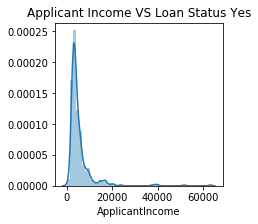

In [43]:
applicantincome_vs_loanstatus_yes = applicantincome_vs_loanstatus[applicantincome_vs_loanstatus['Loan_Status'] == 'Y']
sns.distplot(applicantincome_vs_loanstatus_yes['ApplicantIncome'])
pyplot.rcParams['figure.figsize'] = [3,3]
pyplot.title('Applicant Income VS Loan Status Yes')
pyplot.show()

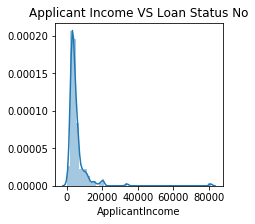

In [44]:
applicantincome_vs_loanstatus_no = applicantincome_vs_loanstatus[applicantincome_vs_loanstatus['Loan_Status'] == 'N']
sns.distplot(applicantincome_vs_loanstatus_no['ApplicantIncome'])
pyplot.rcParams['figure.figsize'] = [3,3]
pyplot.title('Applicant Income VS Loan Status No')
pyplot.show()

### Patterns Identified: 
- It is observed from the data loans given to 70% males and 67 % females.
- It is observed loans given to 71 % graduates and 62 % non-graduates.
- It is observed that loans given to almost 68 % self-employed & non self-employed customers.
- Loans given to 92 % customers with good credit score and 20 % with bad credit score.
- It is observed that customers whose income is less than twenty-five thousand are applying for loans.


# 4. Preparing Data For Machine Learning 

In [45]:
data = data.dropna()
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [46]:
data.shape

(480, 13)

In [47]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
for column in data.columns[1:]:
    #if column == 'Gender' or column == 'Married' or column == 'Education' or column == 'Self_Employed' or column == 'Property_Area' or column == 'Loan_Status':
    if data[column].dtype == type(object):
        #print(column)
        data['New_'+ column] = le.fit_transform(data[column])
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,New_Gender,New_Married,New_Dependents,New_Education,New_Self_Employed,New_Property_Area,New_Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,1,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,0,1,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,1,0,2,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0,0,2,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,2,0,1,2,1


In [48]:
X = data[['New_Gender','New_Married','New_Dependents','New_Education','New_Self_Employed','ApplicantIncome',
          'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','New_Property_Area']]
Y = data[['New_Loan_Status']]

## 4.1 Standardize Data 

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# 5. Feature Selection For Machine Learning 
Feature selection is a process where you automatically select those features in your data that
contribute most to the prediction variable or output in which you are interested. Having
irrelevant features in your data can decrease the accuracy of many models, especially linear
algorithms like linear and logistic regression. Three benefits of performing feature selection
before modeling your data are:
   - Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
   - Improves Accuracy: Less misleading data means modeling accuracy improves.
   - Reduces Training Time: Less data means that algorithms train faster.

## 5.1 Univariate Selection 
Statistical tests can be used to select those features that have the strongest relationship with
the output variable. The scikit-learn library provides the SelectKBest class that can be used
with a suite of different statistical tests to select a specific number of features. The example
below uses the chi-squared (chi2) statistical test for non-negative features to select 4 of the best
features from the Pima Indians onset of diabetes dataset.

In [51]:
# Feature Extraction with Univariate Statistical Tests (Chi - squared for classification)
# feature extraction

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func = chi2, k = 4)
fit = test.fit(X,Y)
# summarize scores
set_printoptions(precision = 2 )
print(fit.scores_)
chi_value = pd.Series(fit.scores_,index = X.columns)
chi_value.sort_values(ascending = False, inplace = True)
chi_value

[3.58e-01 2.13e+00 8.06e-01 1.79e+00 4.99e-01 5.34e+03 4.99e+03 1.10e+02
 3.62e-01 1.96e+01 2.78e-01]


ApplicantIncome      5342.195
CoapplicantIncome    4988.307
LoanAmount            110.437
Credit_History         19.618
New_Married             2.132
New_Education           1.794
New_Dependents          0.806
New_Self_Employed       0.499
Loan_Amount_Term        0.362
New_Gender              0.358
New_Property_Area       0.278
dtype: float64

In [52]:
chi_scores = chi2(X,Y)
chi_scores

(array([3.58e-01, 2.13e+00, 8.06e-01, 1.79e+00, 4.99e-01, 5.34e+03,
        4.99e+03, 1.10e+02, 3.62e-01, 1.96e+01, 2.78e-01]),
 array([5.50e-01, 1.44e-01, 3.69e-01, 1.80e-01, 4.80e-01, 0.00e+00,
        0.00e+00, 7.86e-26, 5.47e-01, 9.46e-06, 5.98e-01]))

##### Here first array represents chi square values and second array represents p-values 

In [53]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False, inplace = True)

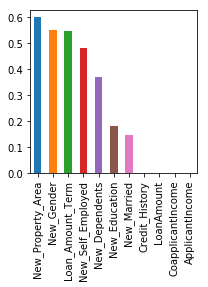

In [54]:
p_values.plot.bar()

#### Here New_Property_Area has the higher the p-value, it says that this variable is independent of the response and can not be considered for model training 

# 5.2 Recursive Feature Elimination
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and
building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.
You can learn more about the RFE class3 in the scikit-learn documentation. The example below
uses RFE with the logistic regression algorithm to select the top 3 features. The choice of
algorithm does not matter too much as long as it is skillful and consistent.

In [55]:
# Feature Extraction with RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model,5)
fit = rfe.fit(X,Y)

print("Num Features: %d" % fit.n_features_) 
print("Selected Features: %s" % fit.support_) 
print("Feature Ranking: %s" % fit.ranking_) 

Num Features: 5
Selected Features: [ True  True False  True  True False False False False  True False]
Feature Ranking: [1 1 3 1 1 7 6 4 5 1 2]


In [56]:
feature_selection = pd.Series(fit.ranking_,index = X.columns)
feature_selection

New_Gender           1
New_Married          1
New_Dependents       3
New_Education        1
New_Self_Employed    1
ApplicantIncome      7
CoapplicantIncome    6
LoanAmount           4
Loan_Amount_Term     5
Credit_History       1
New_Property_Area    2
dtype: int32

# 5.3 Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [57]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

[0.02 0.02 0.07 0.02 0.01 0.18 0.12 0.17 0.05 0.27 0.06]


##### You can see that we are given an importance score for each attribute where the larger the score, the more important the attribute. 

In [58]:
feature_importance = pd.Series(model.feature_importances_,index = X.columns)
feature_importance.sort_values(ascending = False)

Credit_History       0.268
ApplicantIncome      0.177
LoanAmount           0.174
CoapplicantIncome    0.117
New_Dependents       0.066
New_Property_Area    0.059
Loan_Amount_Term     0.054
New_Gender           0.025
New_Married          0.024
New_Education        0.022
New_Self_Employed    0.014
dtype: float64

# 6. Model Building

In [59]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [60]:
X = data[['New_Married','New_Education','ApplicantIncome',
          'CoapplicantIncome','LoanAmount','Credit_History']]
Y = data[['New_Loan_Status']]

# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

In [61]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.809852 (0.051036)
LDA: 0.815115 (0.058911)
KNN: 0.666802 (0.085463)
CART: 0.697503 (0.054416)
NB: 0.807287 (0.061868)
SVM: 0.711471 (0.061768)


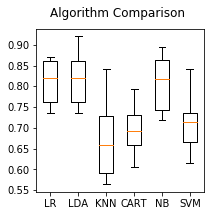

In [62]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [63]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.815115 (0.058911)
ScaledLDA: 0.815115 (0.058911)
ScaledKNN: 0.809784 (0.052699)
ScaledCART: 0.726181 (0.054292)
ScaledNB: 0.807287 (0.061868)
ScaledSVM: 0.807287 (0.051080)


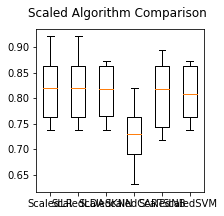

In [64]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Tuning KNN

In [65]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.815104 using {'n_neighbors': 15}
0.744792 (0.066101) with: {'n_neighbors': 1}
0.799479 (0.038597) with: {'n_neighbors': 3}
0.807292 (0.051358) with: {'n_neighbors': 5}
0.796875 (0.047952) with: {'n_neighbors': 7}
0.809896 (0.052531) with: {'n_neighbors': 9}
0.812500 (0.054462) with: {'n_neighbors': 11}
0.812500 (0.054462) with: {'n_neighbors': 13}
0.815104 (0.051321) with: {'n_neighbors': 15}
0.815104 (0.051321) with: {'n_neighbors': 17}
0.815104 (0.051321) with: {'n_neighbors': 19}
0.815104 (0.051321) with: {'n_neighbors': 21}


# Tuning SVM

In [66]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.817708 using {'C': 0.1, 'kernel': 'linear'}
0.817708 (0.055771) with: {'C': 0.1, 'kernel': 'linear'}
0.817708 (0.060370) with: {'C': 0.1, 'kernel': 'poly'}
0.809896 (0.052313) with: {'C': 0.1, 'kernel': 'rbf'}
0.815104 (0.053926) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.817708 (0.055771) with: {'C': 0.3, 'kernel': 'linear'}
0.815104 (0.064067) with: {'C': 0.3, 'kernel': 'poly'}
0.812500 (0.049172) with: {'C': 0.3, 'kernel': 'rbf'}
0.815104 (0.053926) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.817708 (0.055771) with: {'C': 0.5, 'kernel': 'linear'}
0.812500 (0.060121) with: {'C': 0.5, 'kernel': 'poly'}
0.809896 (0.052313) with: {'C': 0.5, 'kernel': 'rbf'}
0.804688 (0.058687) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.817708 (0.055771) with: {'C': 0.7, 'kernel': 'linear'}
0.812500 (0.060121) with: {'C': 0.7, 'kernel': 'poly'}
0.812500 (0.054462) with: {'C': 0.7, 'kernel': 'rbf'}
0.809896 (0.058827) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.817708 (0.055771) with: {'C': 0.9, 'kernel': 'line

# Ensemble Methods

In [67]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.794399 (0.053552)
GBM: 0.791700 (0.047686)
RF: 0.791565 (0.050175)
ET: 0.770850 (0.052006)


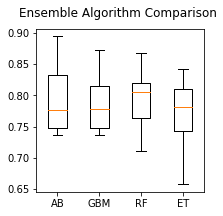

In [68]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# GB Tuning

In [69]:
#param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400,500,700]))
'''param_grid = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1],
    'min_samples_split':[2,4,6,8], 
    'min_samples_leaf':[1,3,5,7,9],
    'max_features':[2,3,4,5],
    'subsample':[0.75,0.8,0.85]
}
model = GradientBoostingClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

'param_grid = {\n    "n_estimators":[5,50,250,500],\n    "max_depth":[1,3,5,7,9],\n    "learning_rate":[0.01,0.1],\n    \'min_samples_split\':[2,4,6,8], \n    \'min_samples_leaf\':[1,3,5,7,9],\n    \'max_features\':[2,3,4,5],\n    \'subsample\':[0.75,0.8,0.85]\n}\nmodel = GradientBoostingClassifier(random_state=seed)\nkfold = KFold(n_splits=num_folds, random_state=seed)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)\ngrid_result = grid.fit(rescaledX, Y_train)\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))'

# Finalize the model
The SVM showed the most promise as a low complexity and stable model for this problem. In
this section we will finalize the model by training it on the entire training dataset and make
predictions for the hold-out validation dataset to confirm our findings. A part of the findings was
that SVM performs better when the dataset is standardized so that all attributes have a mean
value of zero and a standard deviation of one. We can calculate this from the entire training
dataset and apply the same transform to the input attributes from the validation dataset.

In [70]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C = 0.1, kernel = 'linear')
model.fit(rescaledX,Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.7708333333333334
[[14 21]
 [ 1 60]]
              precision    recall  f1-score   support

           0       0.93      0.40      0.56        35
           1       0.74      0.98      0.85        61

   micro avg       0.77      0.77      0.77        96
   macro avg       0.84      0.69      0.70        96
weighted avg       0.81      0.77      0.74        96



# 7. Predictions On Test Data

In [71]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [72]:
test_data['Dependents'].isnull().sum()

10

In [73]:
test_data['Dependents'].mode()

0    0
dtype: object

In [74]:
test_data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [75]:
test_data['Dependents'] = test_data['Dependents'].astype(object)

In [76]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [77]:
test_data.shape

(367, 12)

In [78]:
test_data['Gender'].mode()

0    Male
dtype: object

In [79]:
test_data['Gender'] = test_data['Gender'].fillna('Male')

In [80]:
test_data['Dependents'].mode()

0    0
dtype: object

In [81]:
test_data['Dependents'] = test_data['Dependents'].fillna('0')

In [82]:
test_data['Self_Employed'].mode()

0    No
dtype: object

In [83]:
test_data['Self_Employed'] = test_data['Self_Employed'].fillna('No')

In [84]:
LoanAmountMean = test_data['LoanAmount'].mean()
LoanAmountMean

136.13259668508286

In [85]:
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(LoanAmountMean)

In [86]:
LoanAmountTermMean = test_data['Loan_Amount_Term'].mean()
LoanAmountTermMean

342.53739612188366

In [87]:
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(LoanAmountTermMean)

In [88]:
test_data['Credit_History'].mode()

0    1.0
dtype: float64

In [89]:
test_data['Credit_History'] = test_data['Credit_History'].fillna(1.0)

In [90]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [91]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [92]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
for column in test_data.columns[1:]:
    if test_data[column].dtype == type(object):
        test_data['New_'+ column] = le.fit_transform(test_data[column])
test_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,New_Gender,New_Married,New_Dependents,New_Education,New_Self_Employed,New_Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1,1,0,0,0,2
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1,1,1,0,0,2
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1,1,2,0,0,2
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,1,1,2,0,0,2
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1,0,0,1,0,2


In [93]:
#Xtest_data = test_data[['New_Gender','New_Married','New_Dependents','New_Education','New_Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','New_Property_Area']]
Xtest_data = test_data[['New_Married','New_Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History']]

In [94]:
Xtest_data.shape

(367, 6)

In [95]:
# prepare the model
scaler = StandardScaler().fit(Xtest_data)
rescaledXtest_data = scaler.transform(Xtest_data)
predictions = model.predict(rescaledXtest_data)

In [96]:
test_data['Loan_Status'] = predictions
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,New_Gender,New_Married,New_Dependents,New_Education,New_Self_Employed,New_Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1,1,0,0,0,2,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1,1,1,0,0,2,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1,1,2,0,0,2,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,1,1,2,0,0,2,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1,0,0,1,0,2,1


In [97]:
# No = 0
# Yes = 1
test_data['Loan_Status'] = test_data['Loan_Status'].apply(lambda x: 'Y' if x == 1 else 'N')

In [98]:
sample_submission = test_data[['Loan_ID','Loan_Status']]

In [99]:
sample_submission.to_csv('Submission_V1.csv',index = False)